## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8175 - acc: 0.3521 - val_loss: 1.6390 - val_acc: 0.4206
Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5954 - acc: 0.4330 - val_loss: 1.6369 - val_acc: 0.4227
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5025 - acc: 0.4651 - val_loss: 1.5755 - val_acc: 0.4376
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4487 - acc: 0.4852 - val_loss: 1.5285 - val_acc: 0.4614
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3998 - acc: 0.5001 - val_loss: 1.4480 - val_acc: 0.4797
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3563 - acc: 0.5164 - val_loss: 1.4092 - val_acc: 0.5022
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3179 - acc: 0.5306 - val_loss: 1.4937 - val_acc

50000/50000 [==============================] - 3s 55us/step - loss: 1.8202 - acc: 0.3578 - val_loss: 1.7697 - val_acc: 0.3788
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7360 - acc: 0.3913 - val_loss: 1.6982 - val_acc: 0.4070
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6742 - acc: 0.4100 - val_loss: 1.6505 - val_acc: 0.4170
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6256 - acc: 0.4287 - val_loss: 1.6008 - val_acc: 0.4357
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5828 - acc: 0.4450 - val_loss: 1.5743 - val_acc: 0.4459
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5470 - acc: 0.4559 - val_loss: 1.5423 - val_acc: 0.4552
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5144 - acc: 0.4679 - val_loss: 1.5205 - val_acc: 0.4637
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 55us/step - loss: 2.0605 - acc: 0.2785 - val_loss: 2.0293 - val_acc: 0.2862
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0018 - acc: 0.3010 - val_loss: 1.9808 - val_acc: 0.3037
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.9589 - acc: 0.3146 - val_loss: 1.9434 - val_acc: 0.3167
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.9261 - acc: 0.3271 - val_loss: 1.9155 - val_acc: 0.3270
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.9007 - acc: 0.3358 - val_loss: 1.8930 - val_acc: 0.3346
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8795 - acc: 0.3431 - val_loss: 1.8736 - val_acc: 0.3413
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.8614 - acc: 0.3506 - val_loss: 1.8576 - val_acc: 0.3494
Epoch 10/50
50000/50000 [===========================

Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2018 - acc: 0.2113 - val_loss: 2.1925 - val_acc: 0.2171
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1867 - acc: 0.2229 - val_loss: 2.1776 - val_acc: 0.2284
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1723 - acc: 0.2305 - val_loss: 2.1636 - val_acc: 0.2358
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1586 - acc: 0.2385 - val_loss: 2.1501 - val_acc: 0.2432
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1455 - acc: 0.2435 - val_loss: 2.1374 - val_acc: 0.2495
Epoch 10/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1331 - acc: 0.2490 - val_loss: 2.1252 - val_acc: 0.2562
Epoch 11/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1215 - acc: 0.2540 - val_loss: 2.1140 - val_acc: 0.2592
Epoch 12/50
50000/50000 [==============

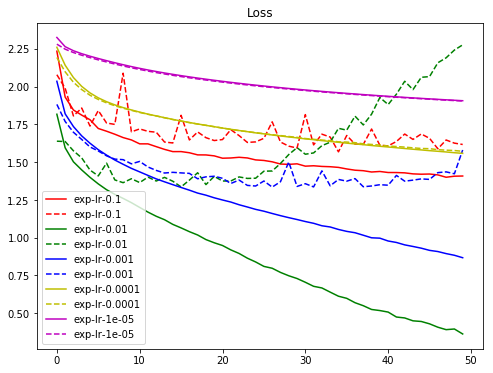

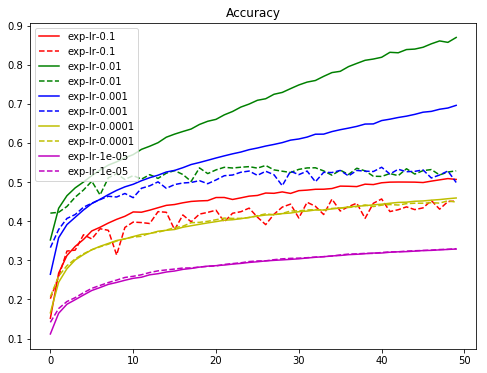

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.75

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9311 - acc: 0.3095 - val_loss: 1.8478 - val_acc: 0.3293
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7379 - acc: 0.3857 - val_loss: 1.7932 - val_acc: 0.3660
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6592 - acc: 0.4125 - val_loss: 1.6855 - val_acc: 0.3990
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5953 - acc: 0.4364 - val_loss: 1.6310 - val_acc: 0.4106
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5565 - acc: 0.4498 - val_loss: 1.5833 - val_acc: 0.4296
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5152 - acc: 0.4664 - val_loss: 1.5425 - val_acc: 0.4504
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4784 - acc: 0.4787 - val_loss: 1.5363 - val_acc

50000/50000 [==============================] - 3s 56us/step - loss: 1.9962 - acc: 0.3046 - val_loss: 1.9485 - val_acc: 0.3167
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9132 - acc: 0.3312 - val_loss: 1.8876 - val_acc: 0.3325
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8641 - acc: 0.3486 - val_loss: 1.8461 - val_acc: 0.3452
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8298 - acc: 0.3610 - val_loss: 1.8210 - val_acc: 0.3569
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8025 - acc: 0.3687 - val_loss: 1.7922 - val_acc: 0.3687
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7792 - acc: 0.3770 - val_loss: 1.7754 - val_acc: 0.3808
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7587 - acc: 0.3866 - val_loss: 1.7551 - val_acc: 0.3833
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1673 - acc: 0.2260 - val_loss: 2.1535 - val_acc: 0.2397
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1407 - acc: 0.2422 - val_loss: 2.1279 - val_acc: 0.2563
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1162 - acc: 0.2566 - val_loss: 2.1045 - val_acc: 0.2688
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0941 - acc: 0.2677 - val_loss: 2.0837 - val_acc: 0.2767
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0743 - acc: 0.2751 - val_loss: 2.0649 - val_acc: 0.2842
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0563 - acc: 0.2831 - val_loss: 2.0477 - val_acc: 0.2900
Epoch 10/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0399 - acc: 0.2899 - val_loss: 2.0322 - val_acc: 0.2989
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 53us/step - loss: 2.3116 - acc: 0.1359 - val_loss: 2.3050 - val_acc: 0.1450
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3037 - acc: 0.1448 - val_loss: 2.2980 - val_acc: 0.1517
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2970 - acc: 0.1515 - val_loss: 2.2919 - val_acc: 0.1587
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.2910 - acc: 0.1582 - val_loss: 2.2864 - val_acc: 0.1621
Epoch 9/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2856 - acc: 0.1632 - val_loss: 2.2814 - val_acc: 0.1649
Epoch 10/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.2807 - acc: 0.1670 - val_loss: 2.2767 - val_acc: 0.1666
Epoch 11/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.2761 - acc: 0.1701 - val_loss: 2.2724 - val_acc: 0.1696
Epoch 12/50
50000/50000 [=========================

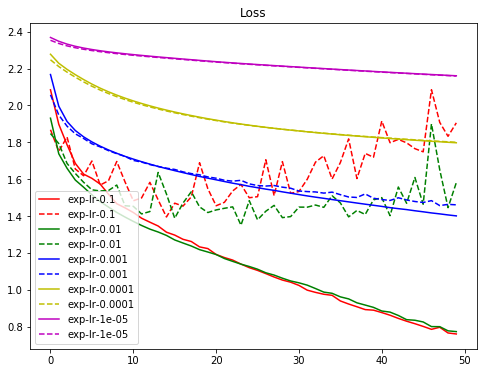

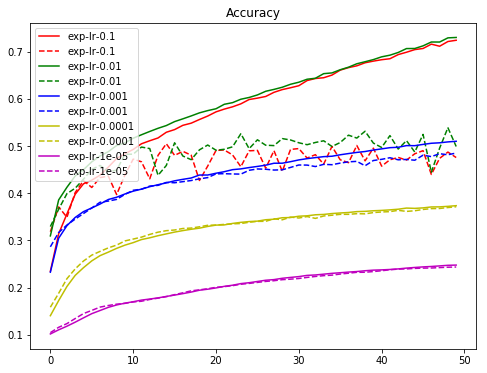

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.9030 - acc: 0.3138 - val_loss: 1.7206 - val_acc: 0.3799
Epoch 2/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6735 - acc: 0.4008 - val_loss: 1.6832 - val_acc: 0.3980
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6120 - acc: 0.4234 - val_loss: 1.5508 - val_acc: 0.4512
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5274 - acc: 0.4549 - val_loss: 1.4936 - val_acc: 0.4701
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4991 - acc: 0.4650 - val_loss: 1.4823 - val_acc: 0.4709
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4552 - acc: 0.4787 - val_loss: 1.4666 - val_acc: 0.4793
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4130 - acc: 0.4974 - val_loss: 1.4568 - val_acc

50000/50000 [==============================] - 3s 55us/step - loss: 1.8396 - acc: 0.3545 - val_loss: 1.7879 - val_acc: 0.3703
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7490 - acc: 0.3871 - val_loss: 1.7182 - val_acc: 0.4018
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6932 - acc: 0.4047 - val_loss: 1.6697 - val_acc: 0.4204
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6468 - acc: 0.4206 - val_loss: 1.6255 - val_acc: 0.4369
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6076 - acc: 0.4352 - val_loss: 1.6135 - val_acc: 0.4205
Epoch 7/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5753 - acc: 0.4450 - val_loss: 1.5723 - val_acc: 0.4408
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5416 - acc: 0.4574 - val_loss: 1.5717 - val_acc: 0.4355
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9694 - acc: 0.3073 - val_loss: 1.9462 - val_acc: 0.3143
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9289 - acc: 0.3220 - val_loss: 1.9115 - val_acc: 0.3266
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8982 - acc: 0.3329 - val_loss: 1.8857 - val_acc: 0.3425
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8738 - acc: 0.3429 - val_loss: 1.8653 - val_acc: 0.3472
Epoch 8/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8551 - acc: 0.3502 - val_loss: 1.8476 - val_acc: 0.3576
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8384 - acc: 0.3570 - val_loss: 1.8334 - val_acc: 0.3594
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8241 - acc: 0.3624 - val_loss: 1.8203 - val_acc: 0.3640
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 56us/step - loss: 2.2394 - acc: 0.1781 - val_loss: 2.2326 - val_acc: 0.1860
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.2237 - acc: 0.1919 - val_loss: 2.2174 - val_acc: 0.1965
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2083 - acc: 0.2022 - val_loss: 2.2024 - val_acc: 0.2095
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1931 - acc: 0.2142 - val_loss: 2.1877 - val_acc: 0.2206
Epoch 9/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1786 - acc: 0.2227 - val_loss: 2.1738 - val_acc: 0.2250
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1651 - acc: 0.2299 - val_loss: 2.1610 - val_acc: 0.2302
Epoch 11/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1526 - acc: 0.2367 - val_loss: 2.1490 - val_acc: 0.2378
Epoch 12/50
50000/50000 [=========================

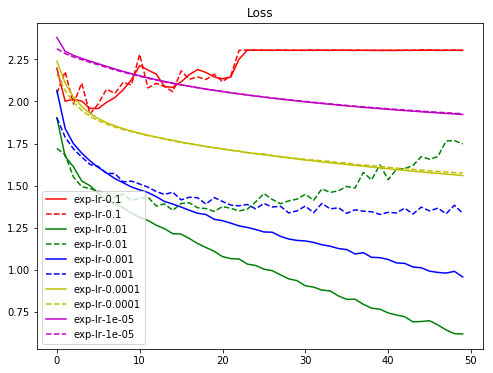

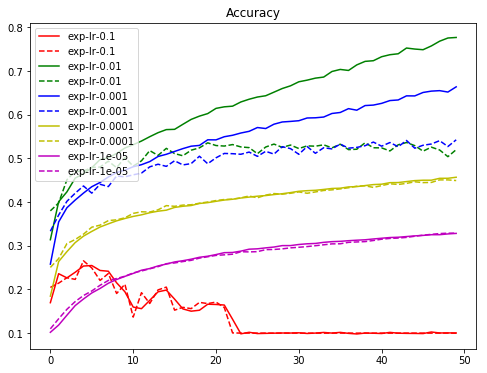

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()